# Multi-Classes Classification by Logistic Regression   
For multi-classes, softmax is used instead of signoid function (for binary classification). 

In [1]:
import numpy as np 
import pandas as pd 

def get_data():
    df = pd.read_csv('./ecommerce_data.csv')
    data = df.as_matrix()
    
    # shuffle 
    np.random.shuffle(data) 
    
    # split features and label 
    X = data[:,:-1]
    Y = data[:,-1].astype(np.int32) 
    
    # one-hot encoding the categorical data 
    N, D = X.shape 
    X2 = np.zeros((N, D+3))  # 4 categories (3 additional columns) 
    X2[:,0:(D-1)] = X[:,0:(D-1)]
    
    for n in range(N): 
        t = int(X[n,D-1])
        X2[n,D+t-1] = 1 
        
    X = X2 
    
    # split train and test 
    Xtrain = X[:-100]
    Ytrain = Y[:-100]
    Xtest = X[-100:]
    Ytest = Y[-100:]
    
    # normalize column 1 and 2 (numerical) 
    for i in (1,2): 
        m = Xtrain[:,i].mean() 
        s = Xtrain[:,i].std() 
        Xtrain[:,i] = (Xtrain[:,i] - m) / s
        Xtest[:,i] = (Xtest[:,i] - m) / s
        
    return Xtrain, Ytrain, Xtest, Ytest 

In [2]:
def softmax(a): 
    expA = np.exp(a) 
    return expA / expA.sum(axis=1, keepdims=True) 

In [3]:
def forward(X, W, b):
    return softmax( X.dot(W) + b )

In [4]:
def predict(P_Y_given_X):
    return np.argmax(P_Y_given_X, axis=1)

In [5]:
def classification_rate(Y, P):
    return np.mean(Y == P)

In [6]:
def cross_entropy(T, pY): 
    return -np.mean(T*np.log(pY))

## Data Preparation 

In [7]:
def vectorize_class(y,K):
    N = len(y)
    ind = np.zeros((N,K))
    for i in range(N):
        ind[i,y[i]] = 1
    return ind

In [8]:
Xtrain, Ytrain, Xtest, Ytest = get_data()
N, D = Xtrain.shape
K = np.max( [np.max(Ytrain), np.max(Ytest)] ) + 1  # the number of classes 

Ytrain_vect = vectorize_class(Ytrain, K) 
Ytest_vect  = vectorize_class(Ytest,  K)

## Training 

In [10]:
# randomly initialize weights
W = np.random.randn(D, K)
b = np.zeros(K)

train_costs = [] 
test_costs = [] 
train_scores = []
test_scores = [] 
learning_rate = 0.001

for i in range(10000):
    pYtrain_vect = forward(Xtrain, W, b) 
    pYtest_vect = forward(Xtest, W, b) 
    
    ctrain = cross_entropy(Ytrain_vect, pYtrain_vect)
    ctest  = cross_entropy(Ytest_vect,  pYtest_vect) 
    train_costs.append(ctrain) 
    test_costs.append(ctest) 
    
    pYtrain = predict(pYtrain_vect) 
    pYtest = predict(pYtest_vect) 
    
    strain = classification_rate(Ytrain, pYtrain)
    stest  = classification_rate(Ytest,  pYtest)
    train_scores.append(strain) 
    test_scores.append(stest) 
    
    # gradient decent 
    W -= learning_rate * Xtrain.T.dot(pYtrain_vect-Ytrain_vect) 
    b -= learning_rate * (pYtrain_vect-Ytrain_vect).sum(axis=0) 
    if i % 1000 == 0:
        print(i, ctrain, ctest) 
        

print("Final train classification_rate: ", classification_rate(Ytrain, pYtrain))
print("Final test classification_rate: ", classification_rate(Ytest, pYtest))


0 0.5595108079312976 0.5768746213530782
1000 0.09028216057925693 0.08495777363416611
2000 0.08601494572274587 0.08586785148074576
3000 0.08425850705453514 0.08761240025763106
4000 0.08329883290465435 0.08938121896521105
5000 0.08269461593276184 0.09100282249738069
6000 0.08228013145848155 0.09245769157471168
7000 0.0819790160441735 0.09376044780608168
8000 0.08175110609272561 0.09493136367460922
9000 0.08157321866728318 0.09598929601735316
Final train classification_rate:  0.915
Final test classification_rate:  0.86


## Cost (i.e., cross entropy) 

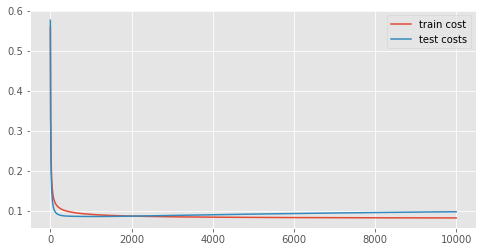

In [11]:
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.style.use("ggplot")

plt.figure(figsize=(8,4))
plt.plot(train_costs, label='train cost') 
plt.plot(test_costs, label='test costs')
plt.legend();

## Score (classification success rate) 

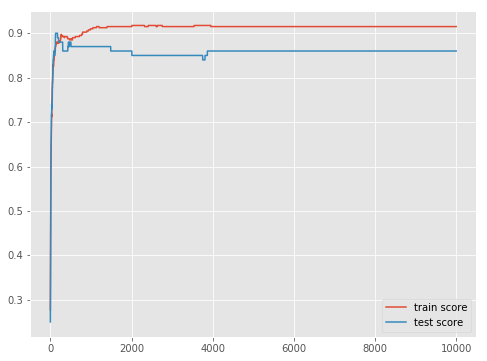

In [12]:
plt.figure(figsize=(8,6))
plt.plot(train_scores, label='train score')
plt.plot(test_scores, label='test score')
plt.legend();